# Planejamento Futuro

## Iremos prever o número de passageiro aéreos no futuro.

### Dividiremos de forma adequada a base de dados e construiremos uma rede neural capaz de realizar previsões. 

In [1]:
#importando a base de dados e as bibliotecas para uso
import pandas as pd
import seaborn as sns
import matplotlib as mpl

#setando os parametros para os gráficos do matplotlib
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

passageiros = pd.read_csv('Passageiros.csv')

In [2]:
#visualizando a serie temporal
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

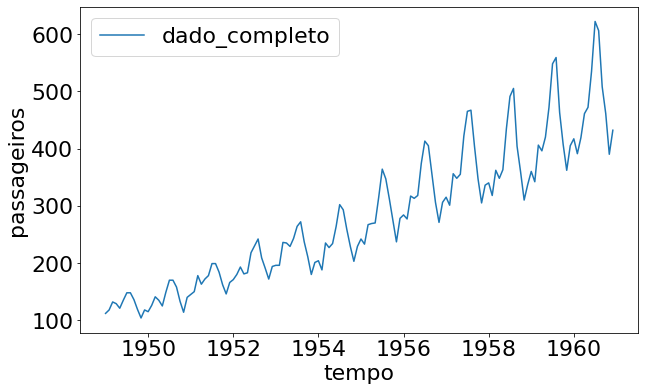

In [3]:
#plotando os dados de serie temporal
sns.lineplot(x='tempo', y='passageiros', data=passageiros,label='dado_completo')

In [4]:
#precisamos escalar os dados, converter os dados proximos a 0 para um melhor intendimento e processamento da rede neural
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [5]:
#ajustando os dados para o StandardScaler entender como os dados estão expostos
sc.fit(passageiros)

StandardScaler()

In [6]:
#dados escalados
dado_escalado = sc.transform(passageiros)

In [7]:
#passando para as variáveis x e y os dados da primeira e segunda coluna transformados.
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<AxesSubplot:>

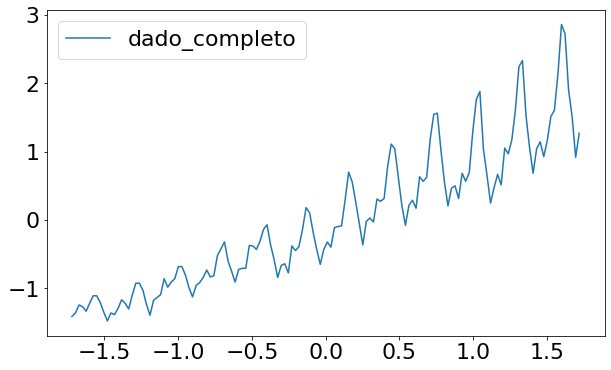

In [8]:
#plotando os dados transformados.
sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')

Text(0.5, 0, 'Tempo')

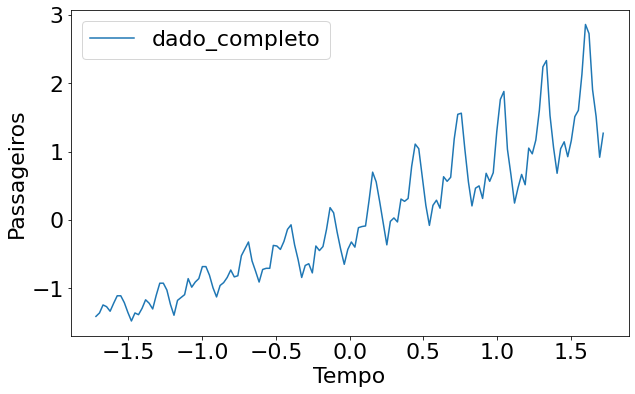

In [9]:
#adicionando legendas no gráfico
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [10]:
#dividindo os dados em treino e teste

#setando 90% dos dados para treino e 10% para teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [11]:
#dividindo o dados para variáveis x e y treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [12]:
#dividindo o dados para variáveis x e y teste
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

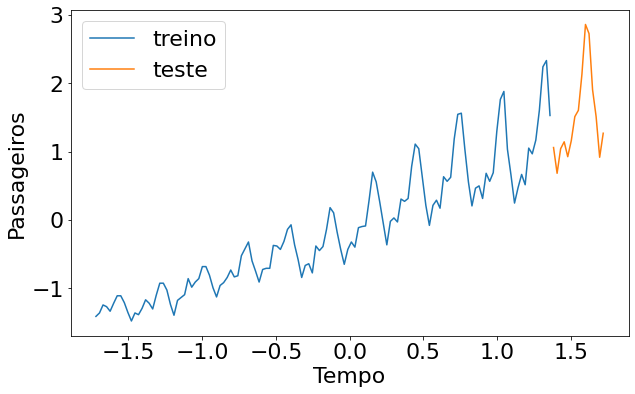

In [13]:
#plotando os dados de treino
sns.lineplot(x=xtreino, y=ytreino,label='treino')
#plotando os dados de teste
sns.lineplot(x=xteste, y=yteste,label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [14]:
#utilizamos uma rede neural em conjuto com uma regressão linear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()

## Criação da sequencia de camada da rede neural

In [15]:
#inicializando a rede neural com a entrada dos dados
#passamos os pesos e os vieses para a rede neural
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', 
                    activation = 'linear',use_bias=False))

In [16]:
#compiltando a estrutura da rede, erro medio quadratico, junto com o adam, otimizador de pesos
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
#resumo da rede neural

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [18]:
#refinando os parâmetros com base nos dados de treino, ou seja, encontraremos as melhores combinações
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [19]:
#visualizando a estimativa de treino

y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


Text(0.5, 0, 'Tempo')

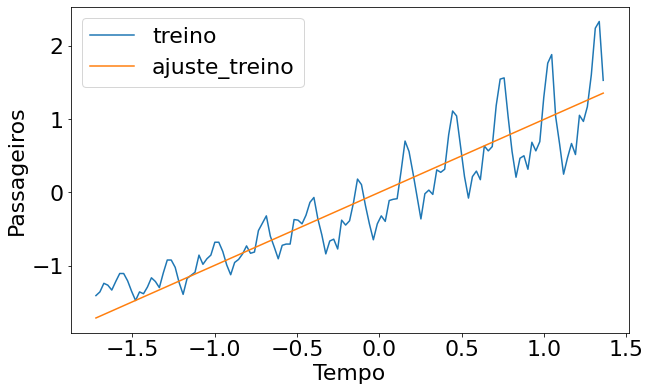

In [20]:
#plotando os resultados
sns.lineplot(x=xtreino, y=ytreino,label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [21]:
#voltaremos os dados para visualizar a quantidade de passageiros
#criaremos um data frame para visualizar os dados.

d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}


In [22]:
resultados = pd.DataFrame(data=d)

In [23]:
resultados

,tempo,passageiros
0,-1.720064,-1.713141
1,-1.696007,-1.689181
2,-1.671950,-1.665221
3,-1.647894,-1.641261
4,-1.623837,-1.617301
...,...,...
124,1.262984,1.257901
125,1.287041,1.281861
126,1.311098,1.305821
127,1.335155,1.329781


In [24]:
#transformação inversa para visualizar os dados

resultado_transf = sc.inverse_transform(resultados)

In [25]:
#alocando os dados no dataframe
resultado_transf = pd.DataFrame(resultado_transf)

In [26]:
#nomeando as colunas do dataframe
resultado_transf.columns = ['tempo', 'passageiros']

In [27]:
resultado_transf

,tempo,passageiros
0,1949.000000,75.494208
1,1949.083333,78.358602
2,1949.166667,81.222997
3,1949.250000,84.087391
4,1949.333333,86.951800
...,...,...
124,1959.333333,430.679464
125,1959.416667,433.543873
126,1959.500000,436.408267
127,1959.583333,439.272662


Text(0.5, 0, 'Tempo')

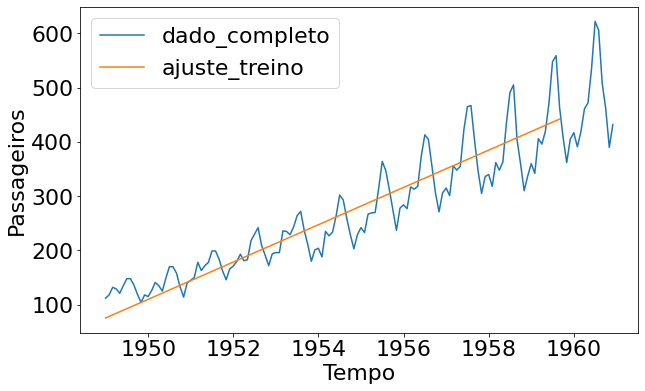

In [28]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [29]:
#variavel temporária para os dados de testes
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 39ms/step


In [30]:
#adicionando no dataframe
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)

In [31]:
#transformação inversa para visualizar
resultado_transf_teste = sc.inverse_transform(resultado_teste)

In [32]:
#adicionando no dataframe os dados invertidos
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [33]:
#nomeando as colunas do dataframe
resultado_transf_teste.columns = ['tempo', 'passageiros']

Text(0.5, 0, 'Tempo')

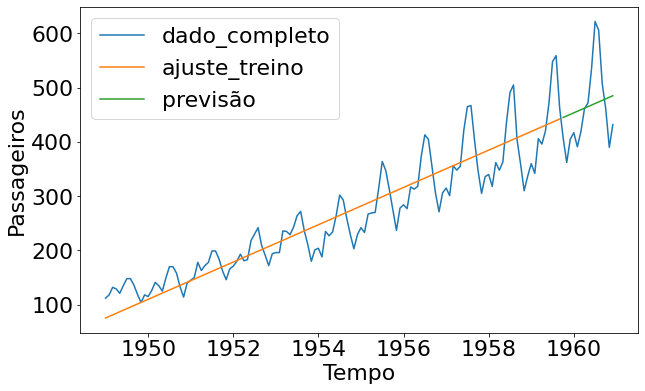

In [34]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf_teste,label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

### O algoritimo aprendeu a construir a reta com os dados treino que estão na mesma faixa dos dados de teste

# Otimizaremos o algoritimo

## Criando uma nova rede neural com estruturas de camados, ou seja, adicionaremos mais neuronios no algoritmo


In [35]:
#criando um novo regressor
regressor2 = Sequential()

In [36]:
#algoritimo com 8 camadas/8 neuronios

#regressor de entrada
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
#regressor/camada escondida
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
#regressor de saida
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

In [37]:
#compilando o algoritimo

regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
#sumario da rede neural
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


# foram criados 8 neuronios e na próxima camada mais 8 neuronios interligados, gerando o total de 64 ligações.

# 8 ligações para saida, no qual temos um total de 80 parâmetros treinaveis.

In [39]:
#como aumentamos a estrutura do algoritimo, utilizamos 200 epocas para treinar e não 5 como padrão
regressor2.fit(xtreino,ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 0.8123
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8063
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8010
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7968
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7946
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7911
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 0.7895
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7884
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7876
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7866
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7864
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7865
Epoch 13/200
5/5 [==============================] - 0s 4ms/s

5/5 [==============================] - 0s 6ms/step - loss: 0.7495
Epoch 105/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7486
Epoch 106/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7474
Epoch 107/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7465
Epoch 108/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7461
Epoch 109/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7455
Epoch 110/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7442
Epoch 111/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7428
Epoch 112/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7419
Epoch 113/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7414
Epoch 114/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7408
Epoch 115/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7400
Epoch 116/200
5/5 [==============================] - 0

In [40]:
#prevendo os valores de treino
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [41]:
#prevendo os valores de teste
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 46ms/step


Text(0.5, 0, 'Tempo')

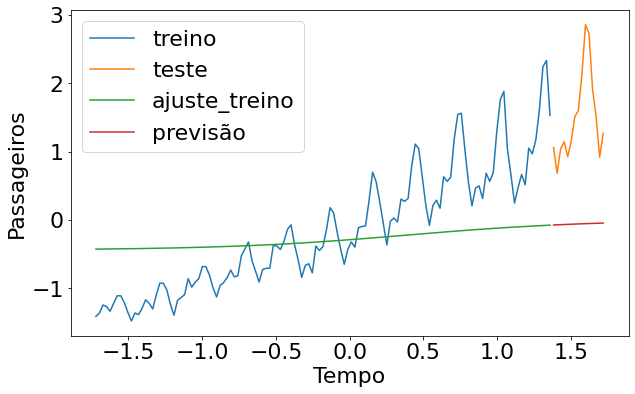

In [42]:
#plotando os dados
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

# Terminada essa predição, vemos que a resposta é um pouco diferente da reta, ela não é uma resposta ótima, definitivamente, mas, trabalhando aqui na estrutura da rede neural, vamos conseguindo, gradualmente, refinar a nossa resposta.

# parâmetros alterados no algoritimo de linear para sigmoid

# ------------------------------------------------------------

# Utilizando vetor para percorrer os dados de entrada

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
import numpy as

In [ ]:
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo